In [18]:
# -*- coding: utf-8 -*-
"""
Created on Mon Jun 17 19:55:01 2019

@author: yjj
"""
import random
import numpy as np
import math
import pandas as pd
indi_num=30#指标总数
I_T=1.2#初始温度
lowest_t=0.1#最低温度
M=150#当连续多次都不接受新的状态，开始改变温度
iteration=100#设置迭代次数
method=1 #0采取步长搜索， 1采取正态分布搜索
iner_tran=1
anneal_speed=0.99
strict_level=1#1-10
g=2
search_speed=0.99
#==========================================

#初始温度

Tk=I_T

#==============数据导入，清洗==============因为没有时间再做API接口，所以先用现有数据进行尝试
csv=pd.read_csv(r"1.csv")#保存为新的utf8文件
stock_name=csv.iloc[1:,2]
return1=csv.iloc[1:,4]
factor=csv.iloc[1:,5:]
return1.astype(np.float)
factor.astype(np.float)
#生成初始解
X=np.random.randint(1,2,indi_num+1)
X_new=X
Weight=np.random.randint(-5,5,indi_num+1)
Weight_new=Weight   #在实际操作中，一般都会权重有经验上的设置，或者是其他的算法得出结果，而这个算法可以在此基础上，构建一个邻域进行优化搜索
r=1.05
R = []
#==========================
while (Tk>lowest_t):#外循环，改变温度

    count_m=0#M的计数
    count_iner=0
    count_iter=0#迭代次数计数

    while (count_m<M and count_iter<iteration):#内循环，连续多次不接受新的状态或者是迭代多次,跳出内循环        
#==================生成新解===========================================



            jk=random.randint(0,30)
            if X_new[jk]==1:
                X_new[jk]=0
            else:
                X_new[jk]=1

#================生成新的各指标参数向量====================

            for i in range(iner_tran):
                count_iner=count_iner+1

                stock_buy=[]
                b=[]
                b1=[]
                for i in range(10):
                    r=random.uniform(-1,1)
                    if X_new[i]==1 :
                        if method==1:
                            
                            Weight_new[i]=Weight_new[i]+r*g
                            g=search_speed*g
                        if method==0:
                            Weight_new[i]=np.random.normal(0,1)#优点：策略可以自己调整，其次，波动率可以根据之后算出的因子模型的方差进行调整          
                factor_1=Weight_new*factor*X_new
                            
                for i in range(499):
                    b.append(sum(factor_1.iloc[i,:]))
                r_dict=dict(zip(b,return1))
                print_dict=dict(zip(b,stock_name)) 
                b.sort(reverse=True)                 
                for i in range(10):
                    stock_buy.append(b[i])                          
#ropolis准则============================

        #计算新解的收益率 
                r_new=1
                for i in range(10):
                    r_new=r_new*(1+r_dict[stock_buy[i]]*0.01)
                delta_r=r_new-r
                delta_r=delta_r*strict_level
                    #取0-1浮点随机数
                rand=random.random()
                    #计算指数函数的值
                exp_r=math.exp(delta_r/Tk)
                    #选择
                if delta_r>0:
                    X=X_new
                    r=r_new
                    Weight=Weight_new
                    r_dict_new=r_dict
                    print_dict_new=print_dict
                    stock_buy_new=stock_buy
                elif exp_r>rand:
                    X=X_new
                    r=r_new    
                    Weight=Weight_new
                    r_dict_new=r_dict
                    print_dict_new=print_dict
                    stock_buy_new=stock_buy
                else:
                    count_m=count_m+1
                    print('m',count_m)
                #print(r)
                R.append(r)
            count_iter=count_iter+1
            count_iner=0


    Tk=anneal_speed*Tk  #改变温度，策略可调，温度越高，降低速度越小，局部最优化结果越精准

                        
                        #外循环结束
accuracy=0
for i in range(10):
    if r_dict_new[stock_buy_new[i]]>0:
        accuracy=accuracy+1
accuracy=accuracy*10
print('accuracy:\n')
print(accuracy,'%')
print('因子使用情况：')
print('Factor_use:\n',X)
weight_max=Weight
print('return:',r)
print('购买的股票\n')
for i in stock_buy_new:
    print(print_dict_new[i])






m 1
m 1
m 1
m 1
m 1
m 1
m 1
m 1
m 1
m 1
accuracy:

40 %
因子使用情况：
Factor_use:
 [0 1 0 1 0 0 1 1 0 1 1 0 1 1 0 0 0 0 0 0 0 1 1 0 1 0 1 0 0 1 0]
return: 0.9670255881223824
购买的股票

000655.SZ
000931.SZ
000962.SZ
000563.SZ
600339.SH
000524.SZ
002040.SZ
600485.SH
600168.SH
002030.SZ


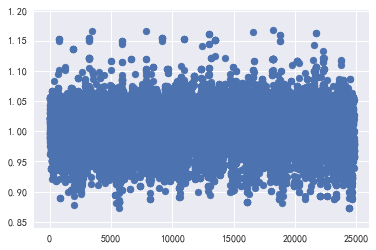

In [19]:
#可视化模块
from pandas import Series, DataFrame
import seaborn as sns
import matplotlib.pyplot as plt
sns.set()
plt.rcParams['font.sans-serif'] = ['SimHei'] # 显示中文标题 
plt.rcParams['axes.unicode_minus'] = False # 正常显示正负号 
%matplotlib inline
s = Series(R)
plt.scatter(s.index,s.values)
plt.show()
plt.close()

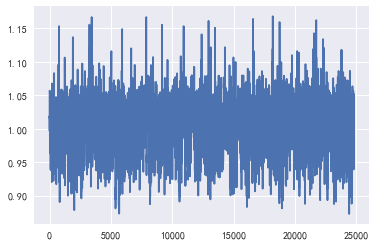

In [20]:
#可视化模块
from pandas import Series, DataFrame
import seaborn as sns
import matplotlib.pyplot as plt
sns.set()
plt.rcParams['font.sans-serif'] = ['SimHei'] # 显示中文标题 
plt.rcParams['axes.unicode_minus'] = False # 正常显示正负号 
%matplotlib inline
s = Series(R)
plt.plot(s)
plt.show()
plt.close()

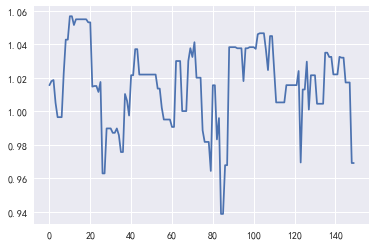

In [21]:
# 前150个r的折线图
s = Series(R[0:150])
plt.plot(s)
plt.show()
plt.close()

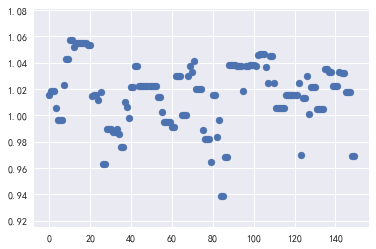

In [24]:
# 前150个r的散点图
s = Series(R[0:150])
plt.scatter(s.index,s.values)
plt.show()
plt.close()

In [25]:
x = [3,5,3,7]
[x.index(i) for i in x if i==3]

[0, 0]

In [34]:
x = [3, 7, 5]
x=sorted(x)

In [35]:
print(x)

[3, 5, 7]
